In [ ]:
Cut the snow images into the selected region of interest in the World Geodetic System (WGS-84; EPSG:4326) coordinate system

In [8]:
# Import libraries
import xarray as xr
import matplotlib.pyplot as plt

Please insert the minimum latitude (in decimal degrees):  46
Please insert the maximum latitude (in decimal degrees):  47
Please insert the minimum longitude (in decimal degrees):  5
Please insert the maximum longitude (in decimal degrees):  7


Saving the SCA map as 'C-SNOW_HS.nc'


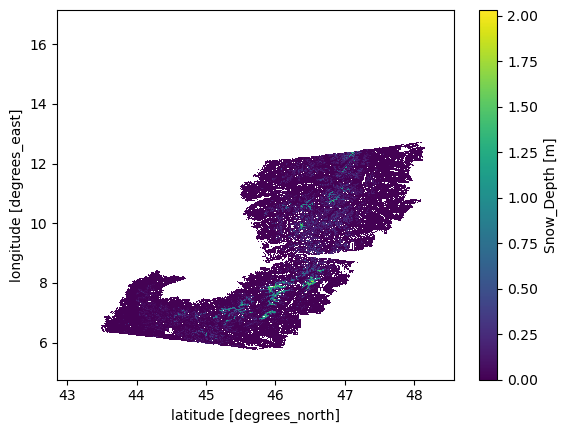

In [12]:
# Read NetCDF image (C-SNOW HS product can be used as an example)
var = 'snd'
ds_path = '/home/federico/Jupyter_Notebooks/C-SNOW_sample/snd_20181101.nc'
ds = xr.open_dataset(ds_path)

# Cut image over a selected area if requested by the user
lat_min = float(input("Please insert the minimum latitude (in decimal degrees): "))
lat_max = float(input("Please insert the maximum latitude (in decimal degrees): "))
lon_min = float(input("Please insert the minimum longitude (in decimal degrees): "))
lon_max = float(input("Please insert the maximum longitude (in decimal degrees): "))

# Plot the image in the selected area
if 'time' in ds.coords:
    for t in ds.time:
        plt.figure()
        ds.Snow_cover_classification_map.sel(time=t).plot()
else:
    plt.figure()
    ds[var].plot()

# Save the cut image
save_name = 'C-SNOW_HS.nc'
netcdf_encoding = {var: {'dtype': 'uint8', 'zlib': True, 'complevel': 5, '_FillValue': -9999} 
                   for var in ds.data_vars}
print(f"Saving the image as '{save_name}'")
ds.to_netcdf(save_name, engine="netcdf4", encoding=netcdf_encoding)